In [23]:
import os
from langchain_openai import ChatOpenAI
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

from langgraph.graph import START, StateGraph, END
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display

In [9]:
llm = ChatOpenAI(model="gpt-4o-mini", temperature=.6)

In [12]:
llm.invoke([HumanMessage(content="Hello, how are you?")])

AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_54eb4bd693', 'id': 'chatcmpl-BZmN7Dskl13mUEjL5p9lAeY68wPS6', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7fd2c0b2-056d-4c9d-90f2-0e0509f41d03-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

In [14]:
sys_msg = [
    SystemMessage(content="You are a personal coach tasked with helping the user handle their conflicts."\
                  " You will help the user by asking clarifying questions, providing feedback, and offering"\
                  " suggestions on how to approach the situation. Your goal is to provide the user with a response"\
                  " that comes from a place of empathy."),
]

def response(state: MessagesState):
    return {"messages": [llm.invoke(sys_msg + state["messages"])]}

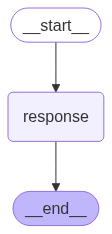

In [24]:
builder = StateGraph(MessagesState)

# Add nodes to the graph
builder.add_node("response", response)

# Add edges to the graph
builder.add_edge(START, "response")
builder.add_edge("response", END)
react_graph = builder.compile()

display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))